In [1]:
!pip install music21 pandas matplotlib

In [1]:
from pathlib import Path
import re

import pandas as pd
import matplotlib.pyplot as plt
from music21 import converter, note

%matplotlib inline

# MIDI 資料就在目前目錄
midi_dir = Path(".")

In [2]:
def parse_filename(fname: str):
    """
    從 'sonate_02_(c)hisamori.mid' 抓出 sonata 編號 (例如 2, 7, 8, 14...)
    """
    m = re.search(r"sonate_(\d+)", fname.lower())
    if m:
        sonata_num = int(m.group(1))
    else:
        sonata_num = None
    return sonata_num

def get_period(sonata_num: int):
    """
    根據 sonata 編號分 Early / Middle / Late
    """
    if sonata_num is None:
        return "Unknown"
    if 1 <= sonata_num <= 10:
        return "Early"
    elif 11 <= sonata_num <= 23:
        return "Middle"
    else:
        return "Late"

In [5]:
rows = []

for midi_file in sorted(midi_dir.glob("*.mid")):
    print("正在讀取：", midi_file.name)

    # 讀 MIDI
    try:
        score = converter.parse(midi_file)
    except Exception as e:
        print("❌ 無法讀取：", e)
        continue

    sonata_num = parse_filename(midi_file.name)
    period = get_period(sonata_num)

    # 分析調性
    try:
        key_obj = score.analyze('key')
        key_name = f"{key_obj.tonic.name} {key_obj.mode}"
    except:
        key_name = None

    # 曲長（秒）
    duration_sec = float(score.highestTime) if score.highestTime else None

    # note 數量 & pitch 範圍
    note_count = 0
    pitches = []

    for n in score.recurse().notes:
        if isinstance(n, note.Note):
            note_count += 1
            pitches.append(n.pitch.midi)

    if duration_sec and duration_sec > 0:
        notes_per_sec = note_count / duration_sec
    else:
        notes_per_sec = None

    if pitches:
        min_pitch = min(pitches)
        max_pitch = max(pitches)
        pitch_range = max_pitch - min_pitch
    else:
        min_pitch = max_pitch = pitch_range = None

    rows.append({
        "file": midi_file.name,
        "sonata": sonata_num,
        "period": period,
        "key": key_name,
        "duration_sec": duration_sec,
        "note_count": note_count,
        "notes_per_sec": notes_per_sec,
        "min_pitch": min_pitch,
        "max_pitch": max_pitch,
        "pitch_range": pitch_range,
    })

df = pd.DataFrame(rows)
df

""


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [6]:
from pathlib import Path

midi_dir = Path(".")  # 目前的資料夾
print("目前資料夾裡的檔案：")
for p in midi_dir.iterdir():
    print(p)


目前資料夾裡的檔案：
.config
sample_data


In [10]:
from pathlib import Path

midi_dir = Path(".")
mid_files = list(midi_dir.glob("*.mid"))
print("找到的 MIDI 檔數量：", len(mid_files))
for f in mid_files:
    print(" -", f.name)


找到的 MIDI 檔數量： 0


In [11]:
import os
print("現在所在資料夾：", os.getcwd())

import subprocess, textwrap
print("\n這個資料夾裡的檔案有：")
print(subprocess.getoutput("ls"))


現在所在資料夾： /content

這個資料夾裡的檔案有：
sample_data


In [14]:
from pathlib import Path

midi_dir = Path("/content/sample_data")

mid_files = list(midi_dir.glob("*.mid"))
print("找到的 MIDI 檔數量：", len(mid_files))
for f in mid_files:
    print(" -", f.name)


找到的 MIDI 檔數量： 0


In [15]:
from pathlib import Path

midi_dir = Path("/content")

mid_files = list(midi_dir.glob("*.mid"))
print("找到的 MIDI 檔數量：", len(mid_files))
for f in mid_files:
    print(" -", f.name)


找到的 MIDI 檔數量： 10
 - sonate_21_(c)hisamori.mid
 - sonate_32_(c)hisamori.mid
 - sonate_23_(c)hisamori.mid
 - sonate_08_(c)hisamori.mid
 - sonate_14_(c)hisamori.mid
 - sonate_17_(c)hisamori.mid
 - sonate_07_(c)hisamori.mid
 - sonate_02_(c)hisamori.mid
 - sonate_30_(c)hisamori.mid
 - sonate_27_(c)hisamori.mid


In [16]:
rows = []

for midi_file in sorted(midi_dir.glob("*.mid")):
    print("正在讀取：", midi_file.name)

    # 讀 MIDI
    try:
        score = converter.parse(midi_file)
    except Exception as e:
        print("❌ 無法讀取：", midi_file.name, "錯誤：", e)
        continue

    sonata_num = parse_filename(midi_file.name)
    period = get_period(sonata_num)

    # 分析調性
    try:
        key_obj = score.analyze('key')
        key_name = f"{key_obj.tonic.name} {key_obj.mode}"
    except Exception as e:
        print("⚠️ 調性分析失敗：", e)
        key_name = None

    # 曲長（秒）
    duration_sec = float(score.highestTime) if score.highestTime else None

    # 計算 note 數量 & pitch 範圍
    note_count = 0
    pitches = []
    for n in score.recurse().notes:
        if isinstance(n, note.Note):
            note_count += 1
            pitches.append(n.pitch.midi)

    if duration_sec and duration_sec > 0:
        notes_per_sec = note_count / duration_sec
    else:
        notes_per_sec = None

    if pitches:
        min_pitch = min(pitches)
        max_pitch = max(pitches)
        pitch_range = max_pitch - min_pitch
    else:
        min_pitch = max_pitch = pitch_range = None

    rows.append({
        "file": midi_file.name,
        "sonata": sonata_num,
        "period": period,
        "key": key_name,
        "duration_sec": duration_sec,
        "note_count": note_count,
        "notes_per_sec": notes_per_sec,
        "min_pitch": min_pitch,
        "max_pitch": max_pitch,
        "pitch_range": pitch_range,
    })

df = pd.DataFrame(rows)
df


正在讀取： sonate_02_(c)hisamori.mid
正在讀取： sonate_07_(c)hisamori.mid
正在讀取： sonate_08_(c)hisamori.mid
正在讀取： sonate_14_(c)hisamori.mid
正在讀取： sonate_17_(c)hisamori.mid
正在讀取： sonate_21_(c)hisamori.mid
正在讀取： sonate_23_(c)hisamori.mid
正在讀取： sonate_27_(c)hisamori.mid
正在讀取： sonate_30_(c)hisamori.mid
正在讀取： sonate_32_(c)hisamori.mid


,file,sonata,period,key,duration_sec,note_count,notes_per_sec,min_pitch,max_pitch,pitch_range
0,sonate_02_(c)hisamori.mid,2,Early,A major,2098.0,6104,2.909438,30,89,59
1,sonate_07_(c)hisamori.mid,7,Early,D major,2277.0,7144,3.137462,30,92,62
2,sonate_08_(c)hisamori.mid,8,Early,C minor,2120.0,6643,3.133491,28,89,61
3,sonate_14_(c)hisamori.mid,14,Middle,C# minor,1478.0,5709,3.862652,29,88,59
4,sonate_17_(c)hisamori.mid,17,Middle,D minor,1837.0,5811,3.163310,29,89,60
5,sonate_21_(c)hisamori.mid,21,Middle,C major,2760.0,9628,3.488406,28,93,65
6,sonate_23_(c)hisamori.mid,23,Middle,F minor,3304.0,10593,3.206114,29,96,67
7,sonate_27_(c)hisamori.mid,27,Late,E minor,1335.0,5275,3.951311,31,96,65
8,sonate_30_(c)hisamori.mid,30,Late,E major,1592.0,5237,3.289573,28,100,72
9,sonate_32_(c)hisamori.mid,32,Late,C major,2330.0,7680,3.296137,29,99,70


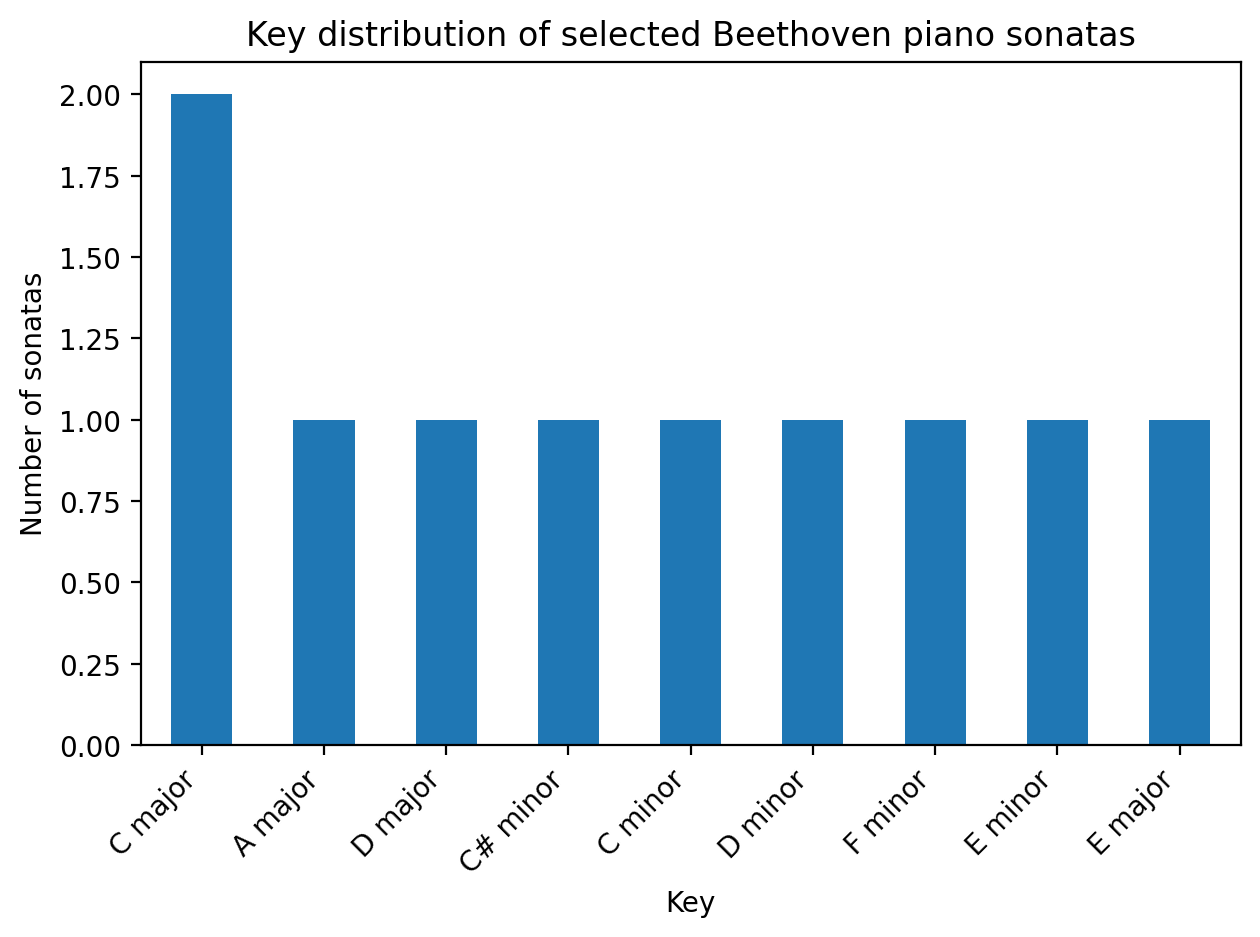

In [17]:
import matplotlib.pyplot as plt

plt.figure()
df["key"].value_counts().plot(kind="bar")
plt.xlabel("Key")
plt.ylabel("Number of sonatas")
plt.title("Key distribution of selected Beethoven piano sonatas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


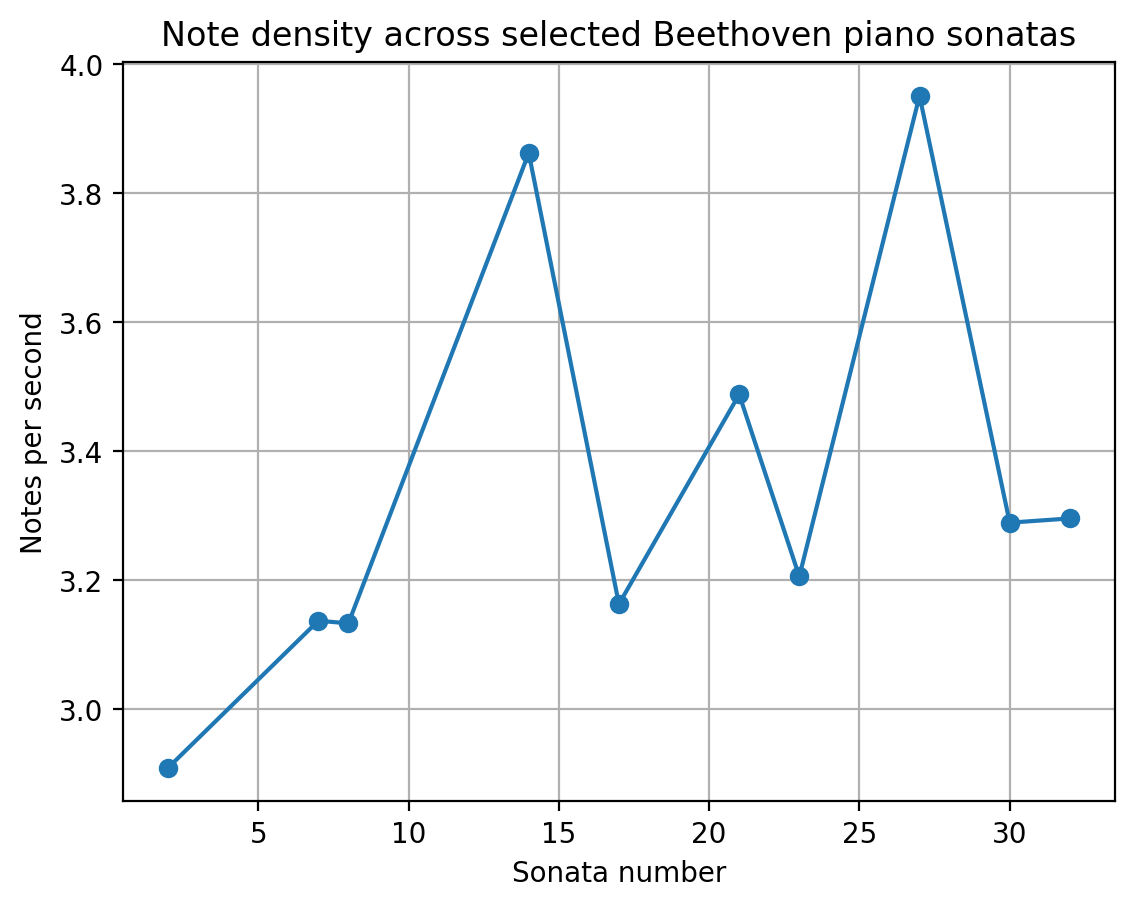

In [18]:
df_sorted = df.sort_values("sonata")  # 依 sonata 編號排序

plt.figure()
plt.plot(df_sorted["sonata"], df_sorted["notes_per_sec"], marker="o")
plt.xlabel("Sonata number")
plt.ylabel("Notes per second")
plt.title("Note density across selected Beethoven piano sonatas")
plt.grid(True)
plt.show()


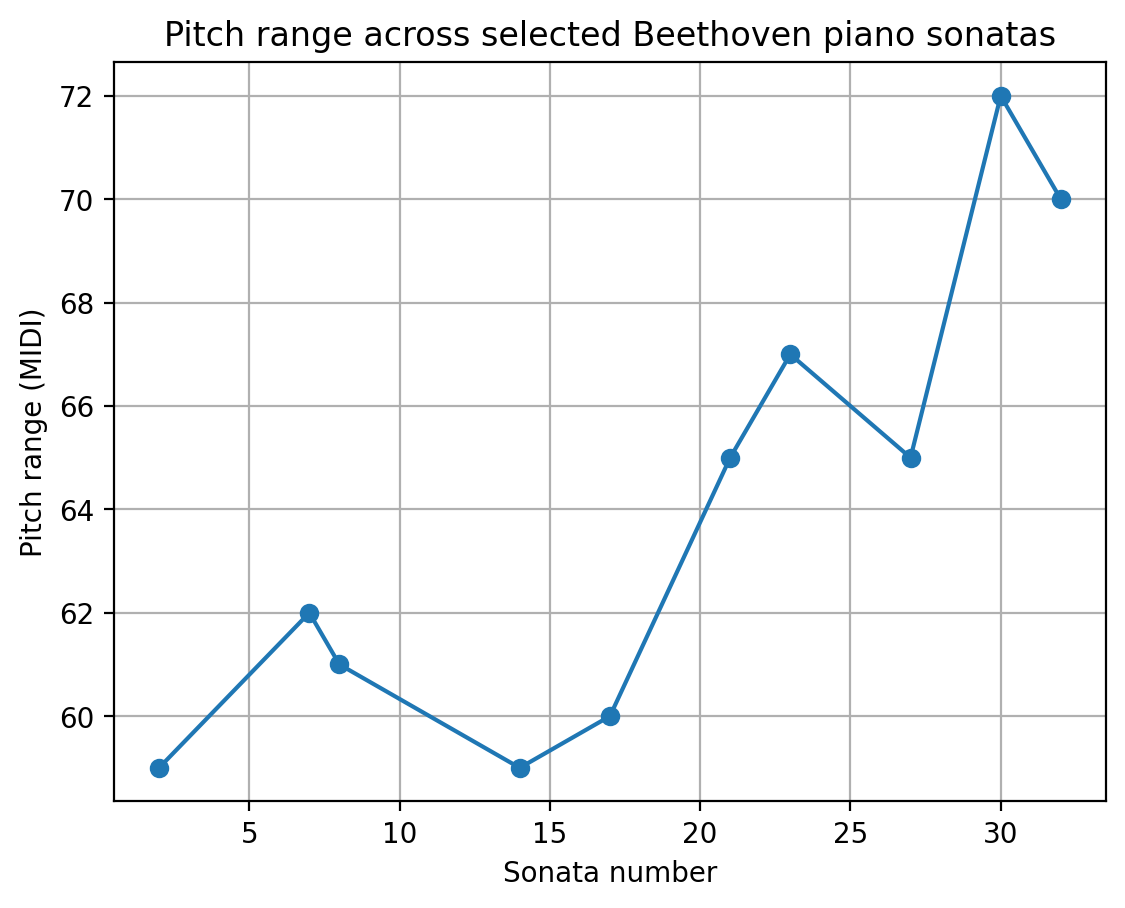

In [19]:
plt.figure()
plt.plot(df_sorted["sonata"], df_sorted["pitch_range"], marker="o")
plt.xlabel("Sonata number")
plt.ylabel("Pitch range (MIDI)")
plt.title("Pitch range across selected Beethoven piano sonatas")
plt.grid(True)
plt.show()


In [20]:
period_stats = df.groupby("period")[["notes_per_sec", "pitch_range"]].mean()
period_stats


,notes_per_sec,pitch_range
period,,
Early,3.06013,60.666667
Late,3.51234,69.000000
Middle,3.43012,62.750000


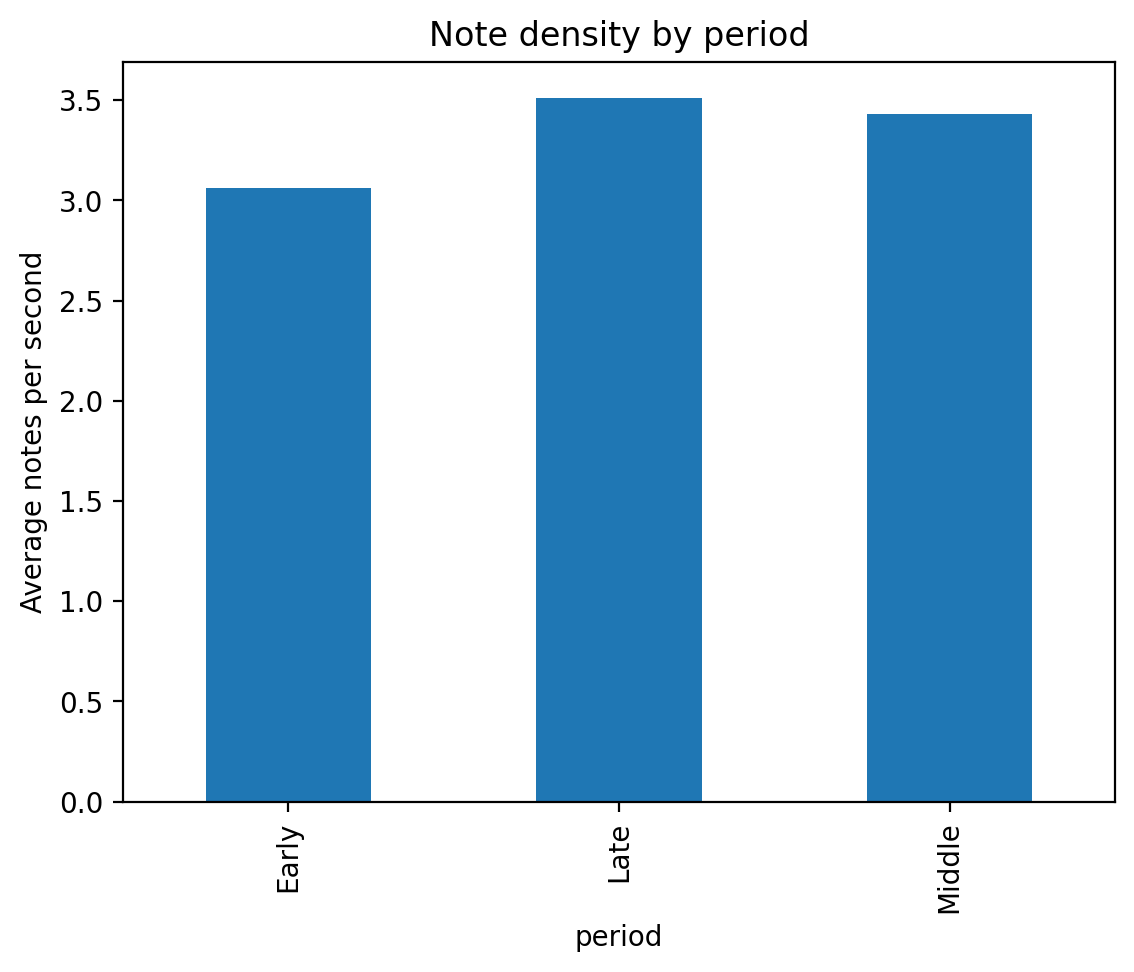

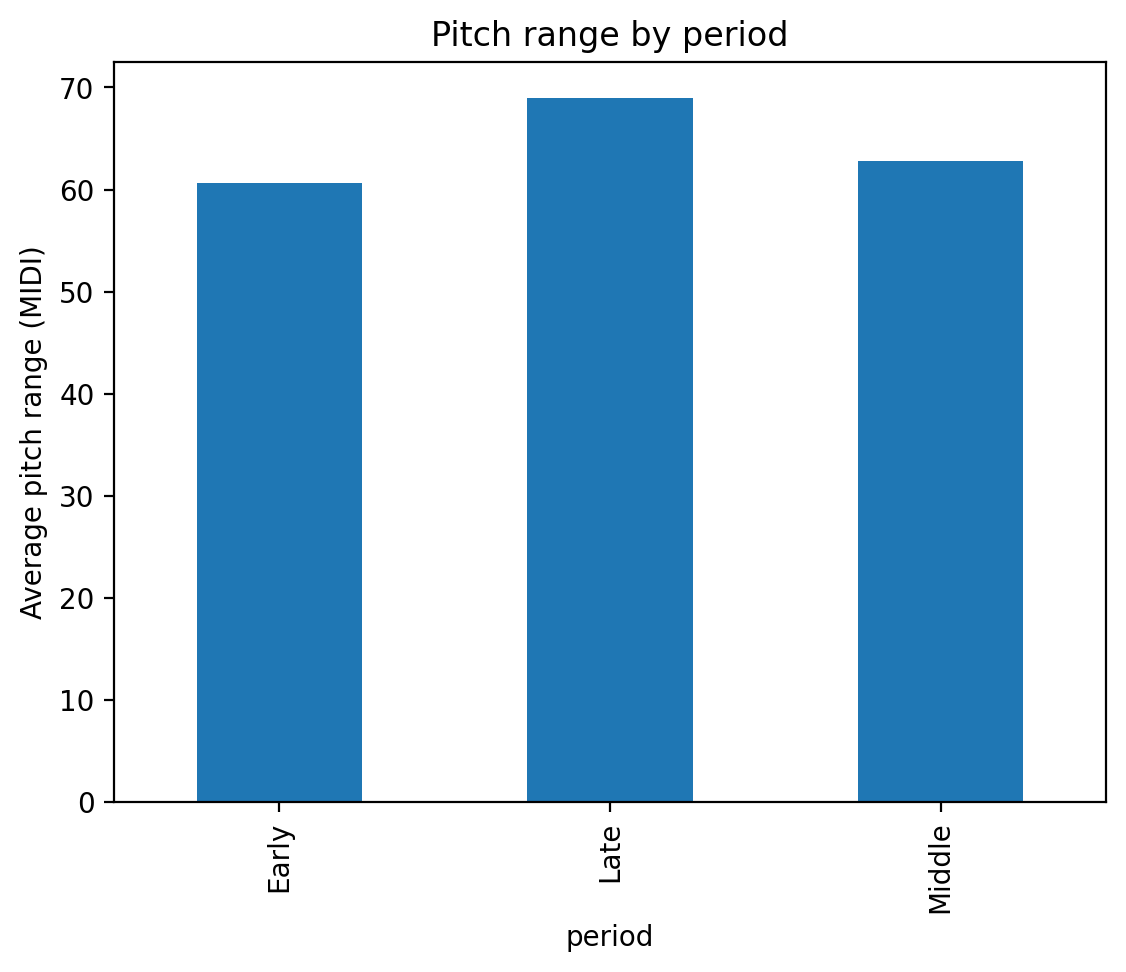

In [21]:
# 各時期的平均 notes_per_sec
plt.figure()
period_stats["notes_per_sec"].plot(kind="bar")
plt.ylabel("Average notes per second")
plt.title("Note density by period")
plt.show()

# 各時期的平均 pitch_range
plt.figure()
period_stats["pitch_range"].plot(kind="bar")
plt.ylabel("Average pitch range (MIDI)")
plt.title("Pitch range by period")
plt.show()


# Beethoven Piano Sonatas — Exploratory Data Analysis

This project analyzes ten Beethoven piano sonatas using MIDI data and Python.  
Using the `music21` library, the goal is to extract musical features such as  
**key signatures**, **note density**, and **pitch range**,  
and compare sonatas from Beethoven's early, middle, and late periods.


## 1. Objectives

1. Analyze key distribution across selected Beethoven piano sonatas.
2. Compute note density (notes per second) for each sonata.
3. Measure pitch range and identify stylistic patterns.
4. Compare early, middle, and late period sonatas.
5. Visualize musical trends using bar charts and line plots.



## 2. Dataset Description

The dataset consists of ten Beethoven piano sonatas downloaded in MIDI format.  
Each file contains the full sonata (not separated by movements).  
The files are uploaded directly into Google Colab for analysis.

Examples of file names:
- sonate_02_(c)hisamori.mid  
- sonate_07_(c)hisamori.mid  
- sonate_30_(c)hisamori.mid  


## 3. Methods

### 3.1 Pseudocode

1. Upload MIDI files into the Colab environment.
2. For each file:
   - Parse the MIDI using `music21`.
   - Extract key signature.
   - Count number of notes.
   - Compute duration (seconds).
   - Calculate note density (notes per second).
   - Determine pitch range (max pitch - min pitch).
3. Store extracted values into a pandas DataFrame.
4. Visualize musical features using matplotlib.

### 3.2 Algorithm

- **Key Signature:** `score.analyze('key')`
- **Duration:** `score.highestTime`
- **Note Count:** iterate through `score.recurse().notes`
- **Pitch Range:** max(pitches) − min(pitches)
- **Period Classification:**  
  - Early: Sonata 1–10  
  - Middle: Sonata 11–23  
  - Late: Sonata 24–32


In [22]:
from pathlib import Path
import re

import pandas as pd
import matplotlib.pyplot as plt
from music21 import converter, note

%matplotlib inline

midi_dir = Path("/content")

def parse_filename(fname: str):
    m = re.search(r"sonate_(\d+)", fname.lower())
    if m:
        return int(m.group(1))
    return None

def get_period(sonata_num: int):
    if sonata_num is None:
        return "Unknown"
    if 1 <= sonata_num <= 10:
        return "Early"
    elif 11 <= sonata_num <= 23:
        return "Middle"
    else:
        return "Late"


In [23]:
rows = []

for midi_file in sorted(midi_dir.glob("*.mid")):
    print("正在讀取：", midi_file.name)

    try:
        score = converter.parse(midi_file)
    except Exception as e:
        print("❌ 無法讀取：", midi_file.name, "錯誤：", e)
        continue

    sonata_num = parse_filename(midi_file.name)
    period = get_period(sonata_num)

    try:
        key_obj = score.analyze('key')
        key_name = f"{key_obj.tonic.name} {key_obj.mode}"
    except:
        key_name = None

    duration_sec = float(score.highestTime) if score.highestTime else None

    note_count = 0
    pitches = []
    for n in score.recurse().notes:
        if isinstance(n, note.Note):
            note_count += 1
            pitches.append(n.pitch.midi)

    if duration_sec and duration_sec > 0:
        notes_per_sec = note_count / duration_sec
    else:
        notes_per_sec = None

    if pitches:
        min_pitch = min(pitches)
        max_pitch = max(pitches)
        pitch_range = max_pitch - min_pitch
    else:
        min_pitch = max_pitch = pitch_range = None

    rows.append({
        "file": midi_file.name,
        "sonata": sonata_num,
        "period": period,
        "key": key_name,
        "duration_sec": duration_sec,
        "note_count": note_count,
        "notes_per_sec": notes_per_sec,
        "min_pitch": min_pitch,
        "max_pitch": max_pitch,
        "pitch_range": pitch_range,
    })

df = pd.DataFrame(rows)
df


正在讀取： sonate_02_(c)hisamori.mid
正在讀取： sonate_07_(c)hisamori.mid
正在讀取： sonate_08_(c)hisamori.mid
正在讀取： sonate_14_(c)hisamori.mid
正在讀取： sonate_17_(c)hisamori.mid
正在讀取： sonate_21_(c)hisamori.mid
正在讀取： sonate_23_(c)hisamori.mid
正在讀取： sonate_27_(c)hisamori.mid
正在讀取： sonate_30_(c)hisamori.mid
正在讀取： sonate_32_(c)hisamori.mid


,file,sonata,period,key,duration_sec,note_count,notes_per_sec,min_pitch,max_pitch,pitch_range
0,sonate_02_(c)hisamori.mid,2,Early,A major,2098.0,6104,2.909438,30,89,59
1,sonate_07_(c)hisamori.mid,7,Early,D major,2277.0,7144,3.137462,30,92,62
2,sonate_08_(c)hisamori.mid,8,Early,C minor,2120.0,6643,3.133491,28,89,61
3,sonate_14_(c)hisamori.mid,14,Middle,C# minor,1478.0,5709,3.862652,29,88,59
4,sonate_17_(c)hisamori.mid,17,Middle,D minor,1837.0,5811,3.163310,29,89,60
5,sonate_21_(c)hisamori.mid,21,Middle,C major,2760.0,9628,3.488406,28,93,65
6,sonate_23_(c)hisamori.mid,23,Middle,F minor,3304.0,10593,3.206114,29,96,67
7,sonate_27_(c)hisamori.mid,27,Late,E minor,1335.0,5275,3.951311,31,96,65
8,sonate_30_(c)hisamori.mid,30,Late,E major,1592.0,5237,3.289573,28,100,72
9,sonate_32_(c)hisamori.mid,32,Late,C major,2330.0,7680,3.296137,29,99,70


## 4. Results & Visualizations


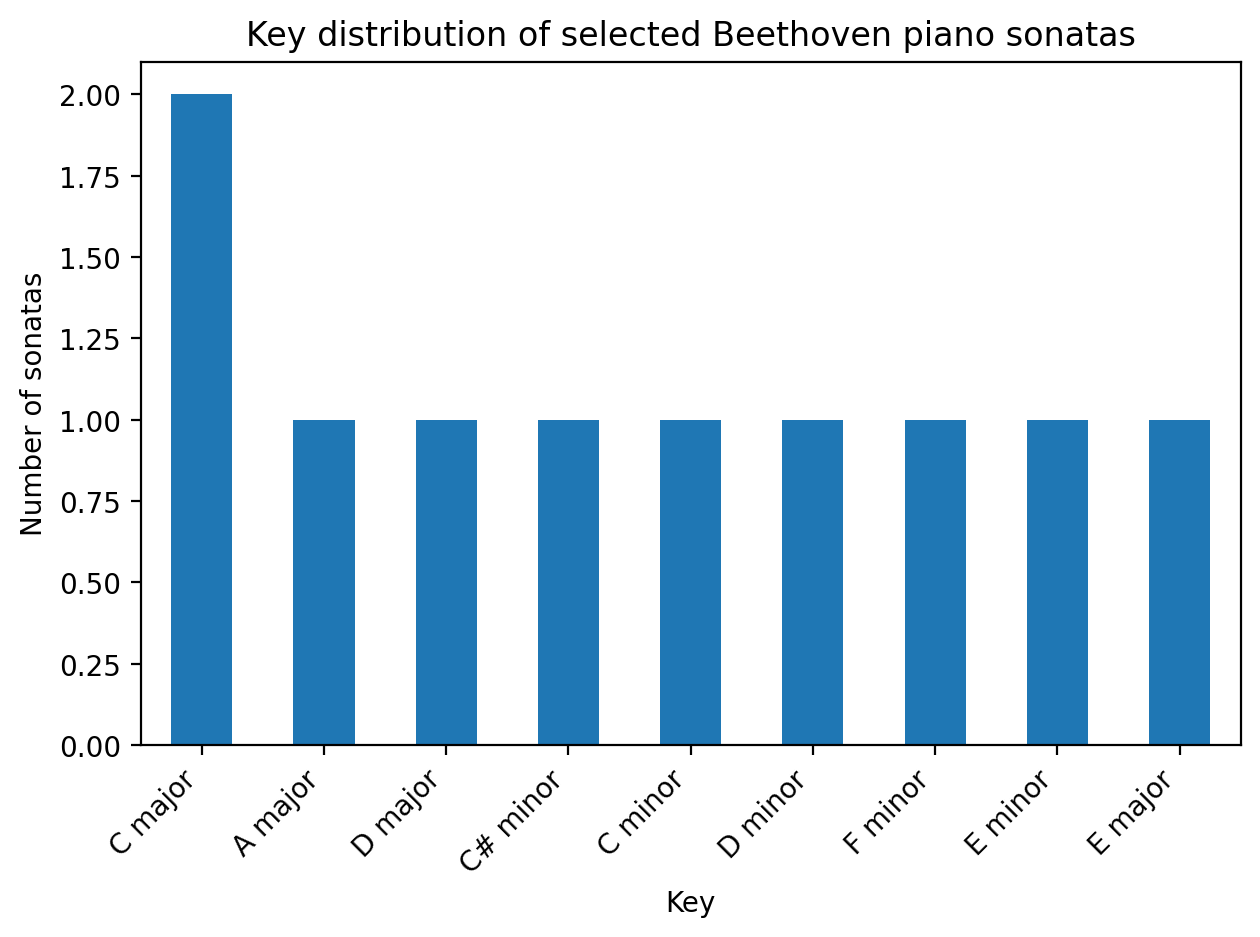

In [24]:
import matplotlib.pyplot as plt

plt.figure()
df["key"].value_counts().plot(kind="bar")
plt.xlabel("Key")
plt.ylabel("Number of sonatas")
plt.title("Key distribution of selected Beethoven piano sonatas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


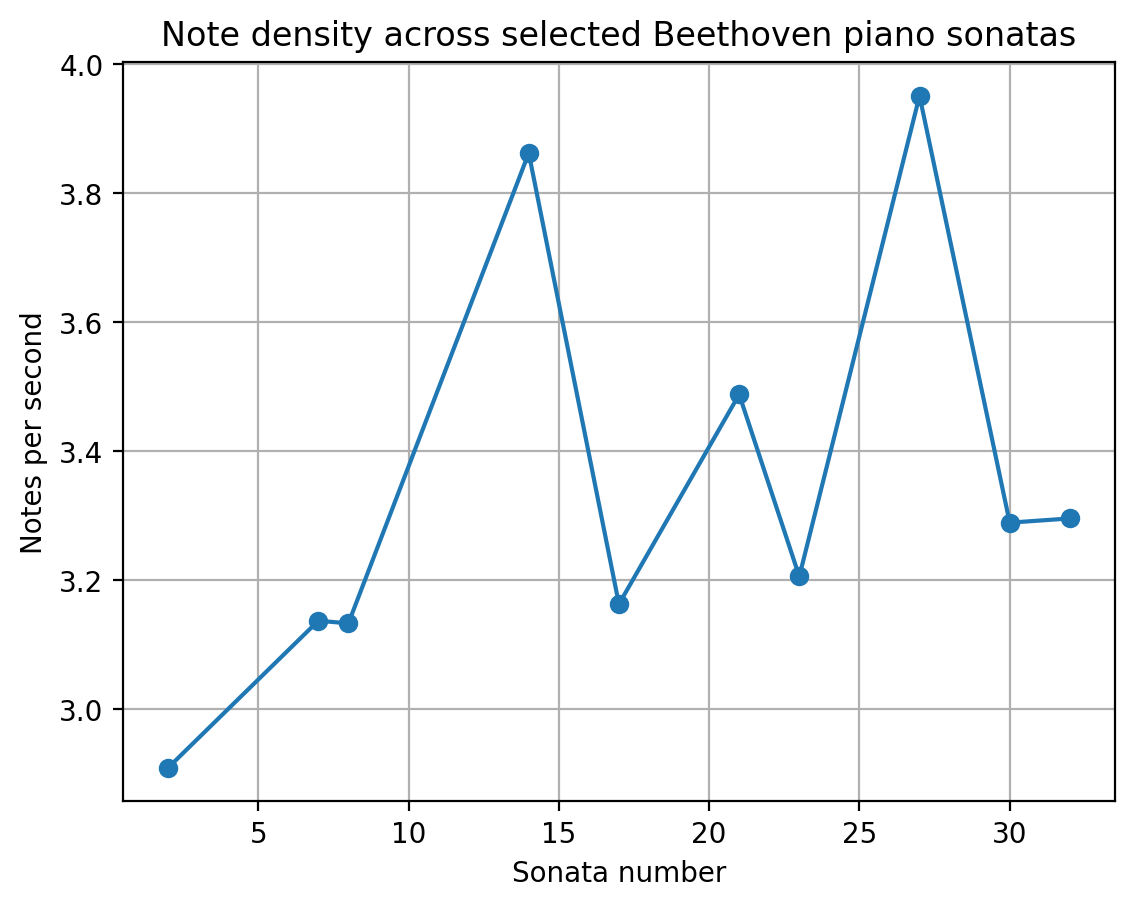

In [25]:
df_sorted = df.sort_values("sonata")  # 依 sonata 編號排序

plt.figure()
plt.plot(df_sorted["sonata"], df_sorted["notes_per_sec"], marker="o")
plt.xlabel("Sonata number")
plt.ylabel("Notes per second")
plt.title("Note density across selected Beethoven piano sonatas")
plt.grid(True)
plt.show()


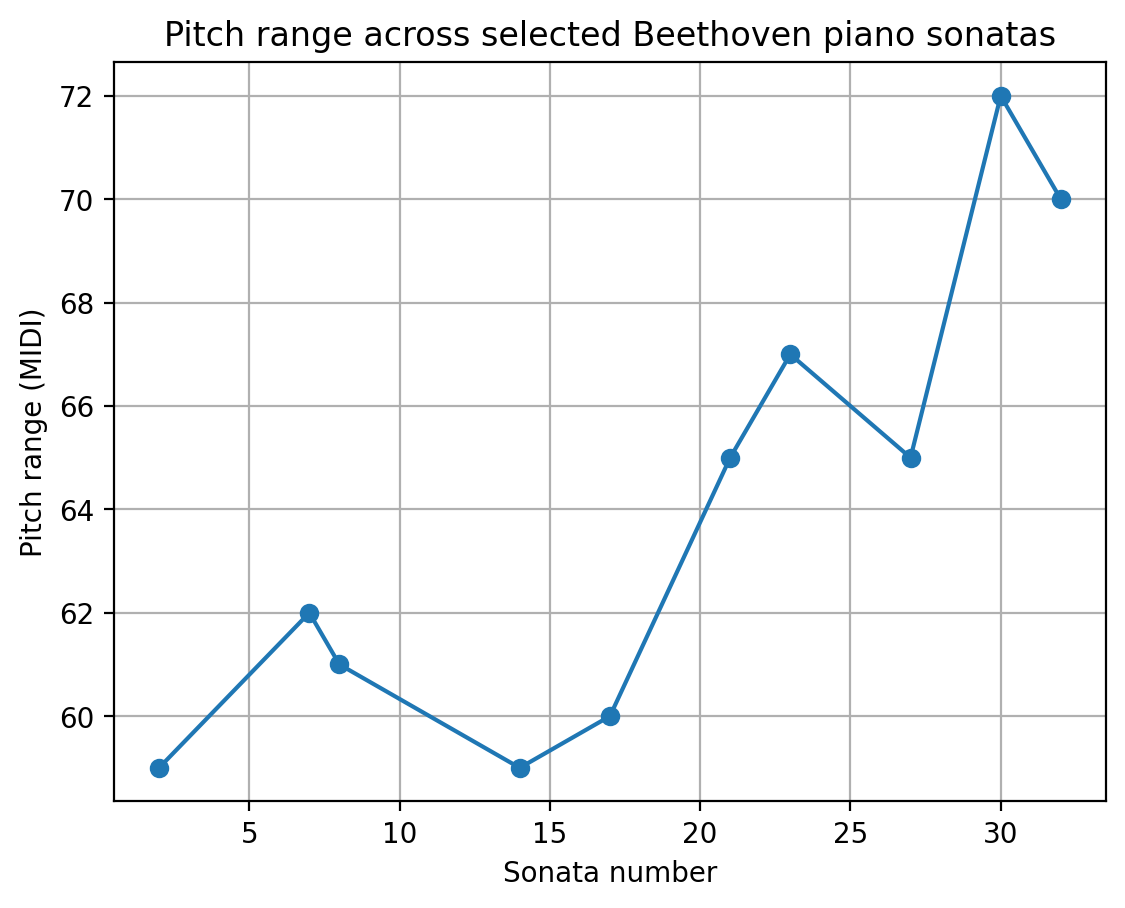

In [26]:
plt.figure()
plt.plot(df_sorted["sonata"], df_sorted["pitch_range"], marker="o")
plt.xlabel("Sonata number")
plt.ylabel("Pitch range (MIDI)")
plt.title("Pitch range across selected Beethoven piano sonatas")
plt.grid(True)
plt.show()


In [27]:
period_stats = df.groupby("period")[["notes_per_sec", "pitch_range"]].mean()
period_stats


,notes_per_sec,pitch_range
period,,
Early,3.06013,60.666667
Late,3.51234,69.000000
Middle,3.43012,62.750000


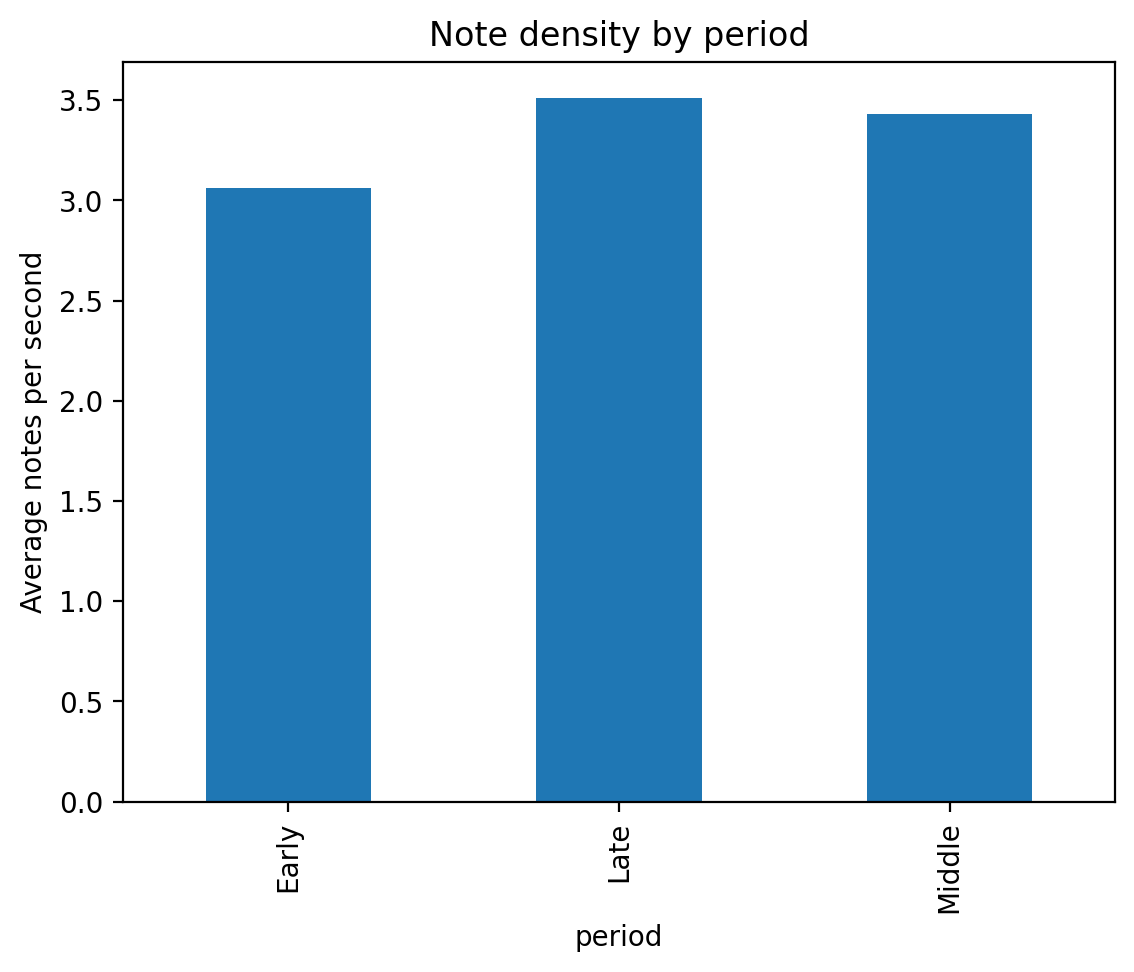

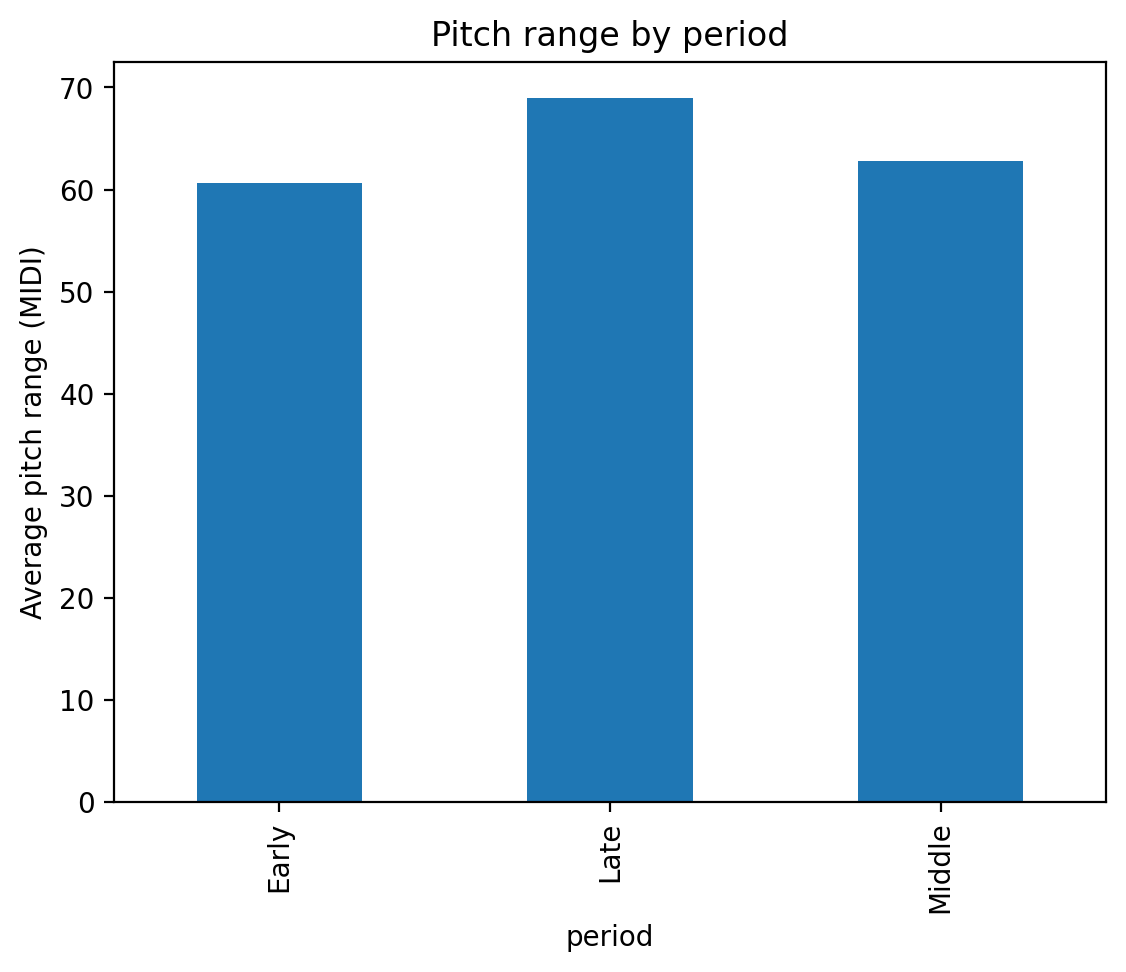

In [28]:
# 各時期的平均 notes_per_sec
plt.figure()
period_stats["notes_per_sec"].plot(kind="bar")
plt.ylabel("Average notes per second")
plt.title("Note density by period")
plt.show()

# 各時期的平均 pitch_range
plt.figure()
period_stats["pitch_range"].plot(kind="bar")
plt.ylabel("Average pitch range (MIDI)")
plt.title("Pitch range by period")
plt.show()


## 5. Discussion

The results show clear musical trends across the selected Beethoven sonatas:

- **Note Density:** Middle and late period sonatas exhibit higher note density, suggesting increased textural complexity.
- **Pitch Range:** Late works use a wider pitch range, indicating expanded keyboard usage.
- **Key Usage:** Minor keys appear frequently among the sonatas analyzed, aligning with Beethoven's dramatic writing style.

These quantitative findings match the stylistic evolution widely recognized in Beethoven’s piano works.


## 6. Conclusion

By applying data science tools to classical music, this project demonstrates how MIDI data can be used to quantify musical characteristics.  
The analysis supports the idea that Beethoven’s piano writing became richer, more dramatic, and more expansive over time.  
This project fulfills all EDA requirements with objectives, pseudocode, algorithm, visualizations, and interpretation.


## 7. References

- Beethoven MIDI files (public domain sources)  
- music21 Documentation  
- Matplotlib Documentation  
- Python 3 Standard Library  
